# OM

In [81]:
# from keras.layers import Dense
# import numpy

In [82]:
# # load pima indians dataset
# dataset = numpy.loadtxt("data/pima-indians-diabetes.data.txt", delimiter=",")
# # split into input (X) and output (Y) variables
# X = dataset[:,0:8]
# Y = dataset[:,8]

In [83]:
# # create model
# model = Sequential()
# model.add(Dense(12, input_dim=8, activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

In [84]:
# # Create your first MLP in Keras
# from keras.models import Sequential
# from keras.layers import Dense
# import numpy
# # fix random seed for reproducibility
# numpy.random.seed(7)
# # load pima indians dataset
# # dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# # split into input (X) and output (Y) variables
# X = dataset[:,0:8]
# Y = dataset[:,8]
# # create model
# model = Sequential()
# model.add(Dense(12, input_dim=8, activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# # Compile model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# # Fit the model
# model.fit(X, Y, epochs=150, batch_size=10)
# # evaluate the model
# scores = model.evaluate(X, Y)
# print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

~~~~~~~~~~~~~~~

In [24]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, InputLayer
from keras.utils import np_utils

from keras.layers.normalization import BatchNormalization

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(2012)

In [2]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


In [3]:
print(X_train.shape)
print('min' , np.min(X_test), 'max : ', np.max(X_test))

(60000, 28, 28)
min 0 max :  255


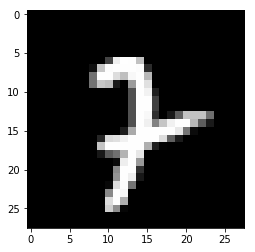

In [4]:
randon_idx = np.random.randint(1000)
plt.imshow(X_test[randon_idx, :, :], cmap='Greys_r' )
plt.show()

In [5]:
#reshape
trainX =  np.reshape(X_train, (X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
testX =  np.reshape(X_test, (X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
# testX =  np.reshape(X_test, [X_test.shape[0]], (X_test.shape[1] * X_test.shape[2]))
print(testX.shape)
print(trainX.shape)


(10000, 784)
(60000, 784)


In [6]:
print(Y_train[0:10])
print(Y_test.shape)
print(X_train.shape)

[5 0 4 1 9 2 1 3 1 4]
(10000,)
(60000, 28, 28)


In [7]:
#Convert One Hot Encoding
Y_test = np_utils.to_categorical(Y_test,  10)
Y_train = np_utils.to_categorical(Y_train,  10)
print(Y_test.shape)
print(Y_train.shape)


(10000, 10)
(60000, 10)


In [8]:
# print(Y_test[0:10, :])
# # print(X_train.shape)

In [9]:
#Model
model = Sequential()
model.add(Dense(512, activation='relu', use_bias=True, input_shape=(784, )))
model.add(Dense(128, activation='relu', use_bias=True, ))
model.add(Dense(10, activation='softmax', use_bias=True))

In [18]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
# history = model.fit(trainX, Y_train, epochs=150, batch_size=10)
history = model.fit(trainX, Y_train, epochs=10, batch_size=1000)
# evaluate the model
scores = model.evaluate(testX, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.9048 - acc: 0.9369
Epoch 2/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.6832 - acc: 0.9460
Epoch 3/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.5507 - acc: 0.9483
Epoch 4/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.3378 - acc: 0.9632
Epoch 5/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.2300 - acc: 0.9734
Epoch 6/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.2111 - acc: 0.9753
Epoch 7/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.2003 - acc: 0.9767
Epoch 8/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1951 - acc: 0.9772
Epoch 9/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1893 - acc: 0.9782
Epoch 10/10
10000/10000 [==============================] - 1s 103us/step

acc: 97.51%


In [19]:
print(history.history.keys())
print(history.history)

dict_keys(['loss', 'acc'])
{'loss': [0.9047759552796681, 0.6832387785116831, 0.5506656795740128, 0.33779004390041034, 0.2299584299325943, 0.21114707589149476, 0.20026489992936453, 0.19507571707169216, 0.18925246670842172, 0.1857842266559601], 'acc': [0.9369073152542114, 0.9460205515225728, 0.9483155240615209, 0.9632337043682734, 0.9734235992034276, 0.9752969115972518, 0.9766985505819321, 0.9771952191988628, 0.9782251964012781, 0.9788935244083404]}


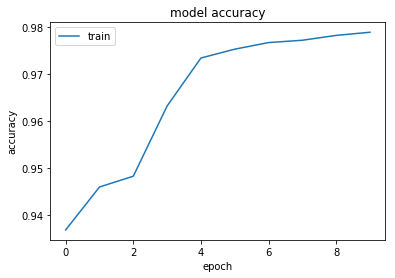

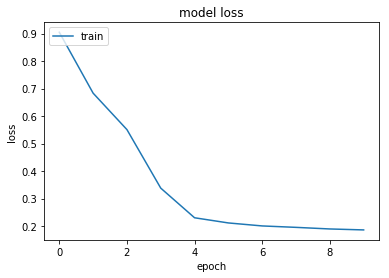

In [23]:
#  "Accuracy"
plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [16]:
model.test_on_batch(testX, Y_test)
model.metrics_names

['loss', 'acc']

In [17]:
history.history

{'acc': [0.8976010253032048], 'loss': [1.5142953157424928]}

In [25]:
#Model 2
model = Sequential()
model.add(Dense(512, activation='relu', use_bias=True, input_shape=(784, )))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', use_bias=True, ))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax', use_bias=True))

In [26]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
# history = model.fit(trainX, Y_train, epochs=150, batch_size=10)
history2 = model.fit(trainX, Y_train, epochs=10, batch_size=1000)
# evaluate the model
scores = model.evaluate(testX, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/10
60000/60000 [==============================] - 9s 158us/step - loss: 0.0645 - acc: 0.9783
Epoch 2/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.0256 - acc: 0.9916
Epoch 3/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.0181 - acc: 0.9941
Epoch 4/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.0135 - acc: 0.9956
Epoch 5/10
60000/60000 [==============================] - 8s 139us/step - loss: 0.0106 - acc: 0.9965
Epoch 6/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.0089 - acc: 0.9970
Epoch 7/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.0072 - acc: 0.9976
Epoch 8/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.0061 - acc: 0.9980
Epoch 9/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.0052 - acc: 0.9984
Epoch 10/10
10000/10000 [==============================] - 1s 149us/step

acc: 99.65%


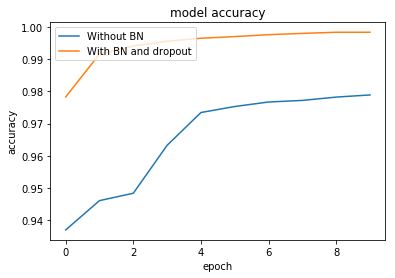

In [30]:
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history2.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Without BN', 'With BN and dropout'], loc='upper left')
plt.show()